In [88]:
#Importing Libraries

import argparse
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping
from sys import argv
from collections import defaultdict
import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.gaussian_process.kernels import RBF

import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1]:
!pip install fsspec
!pip install s3fs
!pip install boto

import pandas as pd
import boto


In [70]:
data1 = pd.read_csv("C:/Users/ankit/OneDrive/Desktop/New folder/CHD1_1.fcs.csv")
#C:\Users\ankit\OneDrive\Desktop\New folder\CHD1_1.fcs.csv
data1

,Event,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,1,96.8,995,1552.3201,2.97,63.36000,70.290000,41.580000,-386.4,-81.6,95.920006,135.160000,0.459
1,2,252.8,707,1641.4200,87.12,38.61000,59.400000,11.880000,-368.0,225.6,1192.460100,747.740050,0.459
2,3,248.0,791,1152.3600,-89.10,-523.71000,1.980000,80.190000,1309.6,-161.6,3009.490000,717.220030,0.459
3,4,229.6,827,708.8400,58.41,1.98000,39.600000,-33.660000,-232.0,56.0,17.440000,81.750000,0.459
4,5,289.6,800,1036.5300,26.73,-621.72003,53.460000,-57.420002,-209.6,-21.6,43.600002,-25.070002,0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1481.6,1046,420.7500,-14.85,319.77000,35.640000,-45.540000,-51.2,-20.0,85.020004,122.080000,11.934
99996,99997,860.0,891,544.5000,-46.53,-237.60000,-22.770000,-20.790000,-92.8,240.0,-33.790000,56.680000,11.934
99997,99998,2175.2,1157,1025.6400,-58.41,303.93000,14.850000,-6.930000,-409.6,2.4,199.470000,183.120010,11.934
99998,99999,1770.4,1002,590.0400,-52.47,258.39000,16.830000,-1.980000,-2.4,-12.0,38.150000,-3.270000,11.934


In [72]:
df=data1.head()
df

,Event,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,1,96.8,995,1552.3201,2.97,63.36000,70.29,41.580000,-386.4,-81.6,95.920006,135.160000,0.459
1,2,252.8,707,1641.4200,87.12,38.61000,59.40,11.880000,-368.0,225.6,1192.460100,747.740050,0.459
2,3,248.0,791,1152.3600,-89.10,-523.71000,1.98,80.190000,1309.6,-161.6,3009.490000,717.220030,0.459
3,4,229.6,827,708.8400,58.41,1.98000,39.60,-33.660000,-232.0,56.0,17.440000,81.750000,0.459
4,5,289.6,800,1036.5300,26.73,-621.72003,53.46,-57.420002,-209.6,-21.6,43.600002,-25.070002,0.460


In [52]:
data2=pd.read_excel('C:\\Users\\ankit\\OneDrive\\Desktop\\Book1.xlsx')
data2


,Unnamed: 0,PC,NC,CL,CM,CH,TL,TM,TH,SL,SM,SH
0,Day 1,243.333333,181.333333,169.666667,156.000000,266.666667,168.333333,160.666667,153.333333,87.333333,59.000000,24.000000
1,Day 2,142.000000,37.333333,114.333333,105.666667,107.333333,112.000000,105.000000,104.333333,92.000000,92.666667,85.333333
2,Day 3,68.000000,17.666667,45.333333,45.666667,46.666667,63.666667,61.000000,57.000000,64.333333,60.000000,58.333333
3,Day 4,41.666667,14.333333,32.666667,27.666667,25.666667,42.333333,42.666667,36.666667,50.000000,46.333333,44.000000
4,Day 5,40.000000,10.000000,26.000000,24.000000,21.666667,31.666667,29.000000,25.000000,36.333333,36.666667,34.333333


In [53]:
from sklearn.cross_decomposition import CCA

In [79]:
Y = df[['FSC-A','SSC-A']]
X= data2[['PC','NC','CL','CM','CH','TL','TM','TH','SL','SM','SH']]


In [80]:
# Instantiate the Canonical Correlation Analysis with 2 components

my_cca = CCA(n_components=2)

# Fit the model
my_cca.fit(X, Y)

CCA()

NameError: name 'i' is not defined

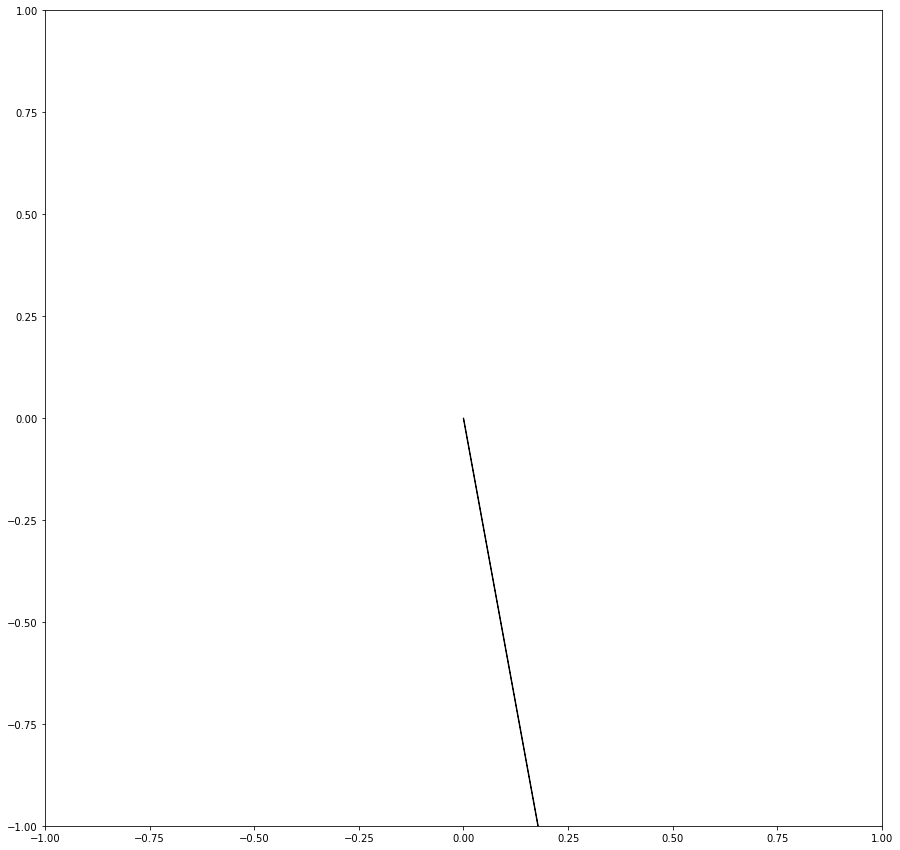

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_
# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))
# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
  x = xyrot[var_i,0]
  y = xyrot[var_i,1]

  plt.arrow(0,0,x,y)
  plt.text(x,y,data.columns[i], color='red' if i >= 6 else 'blue')

plt.show()

